# Homogenisation Section

This will go in order, from combining the following sections

1. Perth Regional Office 1897-1992 with the 1880-1900 Dataset, Homo already done

2. Step 1 Dataset with The ACORN-SAT, Zaks Homogensiation Function

3. An Trail with the extended ACORN-SAT my own Q-Q homogenisation 

Step 0, lets download the packages and files to be used

In [1]:
import sys
sys.path.append(r"C:\Users\jarra\Desktop\Masters\Heatwave_Project")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import PT13_Functions_For_Masters_New_Test as HW_Func
from scipy.stats import norm
from bisect import *
import random
import seaborn as sns
import math

### PERTH REGIONAL OFFICE 1897 TO 1992

In [2]:
## Perth Regional Office Daily Extreme Dataset
#Load PRO in
#BOM PERTH REGIONAL OFFICE
MaxT_PRO = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\IDCJAC0010_009034_1800_Data.csv")
MinT_PRO = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\IDCJAC0011_009034_1800_Data.csv")

#Clean The data
MaxT_PRO['Datetime']= pd.to_datetime(MaxT_PRO[['Year', 'Month', 'Day']])
MinT_PRO['Datetime']= pd.to_datetime(MinT_PRO[['Year', 'Month', 'Day']])

#Delete irrelevent columns
del MaxT_PRO['Product code']
del MaxT_PRO['Bureau of Meteorology station number']
del MaxT_PRO['Year']
del MaxT_PRO['Month']
del MaxT_PRO['Day']
del MaxT_PRO['Days of accumulation of maximum temperature']
del MaxT_PRO['Quality']
del MinT_PRO['Product code']
del MinT_PRO['Bureau of Meteorology station number']
del MinT_PRO['Year']
del MinT_PRO['Month']
del MinT_PRO['Day']
del MinT_PRO['Days of accumulation of minimum temperature']
del MinT_PRO['Quality']

#Change the column name to date
MaxT_PRO= MaxT_PRO.rename(columns={'Datetime':'date'})
MinT_PRO= MinT_PRO.rename(columns={'Datetime':'date'})


#Change the column names
MaxT_PRO= MaxT_PRO.rename(columns={'Maximum temperature (Degree C)':'PRO Max'})
MinT_PRO= MinT_PRO.rename(columns={'Minimum temperature (Degree C)':'PRO Min'})

#Now concat it
MaxT_PRO= MaxT_PRO.set_index('date')
MinT_PRO= MinT_PRO.set_index('date')

PRO_DE = pd.merge(left = MaxT_PRO,right  =MinT_PRO,left_index=True,right_index=True  )
PRO_DE.loc['1904-01-01':'1905-01-01'].head(50)



PRO Max  PRO Min
date                        
1904-01-01     22.8     14.5
1904-01-02     27.5     12.9
1904-01-03     31.9     16.9
1904-01-04     35.1     21.2
1904-01-05     39.0     21.8
1904-01-06     34.7     21.3
1904-01-07     24.6     18.3
1904-01-08     21.5     15.7
1904-01-09     23.1     15.1
1904-01-10     28.3     15.2
1904-01-11     35.0     19.8
1904-01-12     37.3     21.2
1904-01-13     37.9     23.3
1904-01-14     31.3     18.0
1904-01-15     29.2     16.4
1904-01-16     28.4     18.7
1904-01-17     28.2     17.6
1904-01-18     31.1     18.1
1904-01-19     29.9     17.8
1904-01-20     31.0     16.0
1904-01-21     32.9     15.1
1904-01-22     35.1     18.8
1904-01-23     35.3     18.5
1904-01-24     29.5     17.6
1904-01-25     26.7     14.8
1904-01-26     29.7     17.6
1904-01-27     33.6     17.3
1904-01-28     34.9     23.9
1904-01-29     25.6     18.8
1904-01-30     24.1     16.2
1904-01-31     24.3     13.3
1904-02-01     32.7     15.6
1904-02-02     34.7     19.4
1904-02-03     41.5     21.7
1904-02-04     24.2     20.1
1904-02-05     28.3     13.3
1904-02-06     35.4     18.9
1904-02-07     38.7     20.9
1904-02-08     29.8     17.4
1904-02-09     33.9     21.0
1904-02-10     24.8     19.8
1904-02-11     25.1     14.5
1904-02-12     28.4     15.9
1904-02-13     23.3     17.3
1904-02-14     23.6     14.1
1904-02-15     27.3     13.9
1904-02-16     27.1     16.9
1904-02-17     23.9     17.2
1904-02-18     24.9     11.9
1904-02-19     29.2     16.1

### ACORN-SAT 1910-2021

In [3]:
#Max Temp, (drop(0) has dropped the 0th index, so it starts at 1)
MaxT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmax.009021.daily.csv").drop(0)
#Min Temp
MinT_Perth = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\tmin.009021.daily.csv").drop(0)

Maximum = pd.Series(MaxT_Perth['maximum temperature (degC)'], name="Max")
Minimum = pd.Series(MinT_Perth['minimum temperature (degC)'],name="Min")

#The Daily Max Min Ave Data
ACORN_SAT = pd.concat([MaxT_Perth['date'],Maximum,Minimum],axis=1)
ACORN_SAT['date'] = pd.to_datetime(ACORN_SAT['date'],format="%d/%m/%Y")
ACORN_SAT = ACORN_SAT.set_index('date')
ACORN_SAT

Max   Min
date                  
1910-01-01  26.7  16.4
1910-01-02  27.0  13.5
1910-01-03  27.5  12.0
1910-01-04  24.0  13.5
1910-01-05  24.8   9.8
...          ...   ...
2021-06-26  20.3   5.8
2021-06-27  15.6   8.7
2021-06-28  19.7  10.5
2021-06-29  18.0  12.5
2021-06-30  16.8   7.7

[40724 rows x 2 columns]

### Perth Gardens Corrected 1880-1901

In [4]:
P_Gardens_Corr = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\perthgardens_daily_corrected_1880-1900.csv")



#Now we need to go back in time and minus 200 years off the date
#Convert To Datetime


P_Gardens_Corr['time'] = pd.to_datetime(P_Gardens_Corr['time'],format="%d/%m/%Y")
#print(P_Gardens_Corr)
#P_Gardens_Corr

#Split the Year up

P_Gardens_Corr = HW_Func.Date_Splitter(P_Gardens_Corr,'time',single= True)
P_Gardens_Corr['year'] = P_Gardens_Corr['year']-200

P_Gardens_Corr['date'] = pd.to_datetime(P_Gardens_Corr[['year', 'month', 'day']])
P_Gardens_Corr


del P_Gardens_Corr['time']
del P_Gardens_Corr['year']
del P_Gardens_Corr['month']
del P_Gardens_Corr['day']


P_Gardens_Corr = P_Gardens_Corr.set_index('date')
P_Gardens_Corr

tmax       tmin
date                            
1880-01-01  38.494444  26.093889
1880-01-02  40.383333  23.760556
1880-01-03  40.438889  21.427222
1880-01-04  40.716667  22.038333
1880-01-05  39.050000  19.048269
...               ...        ...
1900-12-27  25.800000  14.300000
1900-12-28  25.709091  16.060000
1900-12-29  25.118182  17.754762
1900-12-30  21.955556  14.136364
1900-12-31  23.925000  13.150000

[7670 rows x 2 columns]

### Perth Gardens Uncorrected 1880-1901

<AxesSubplot:xlabel='date'>

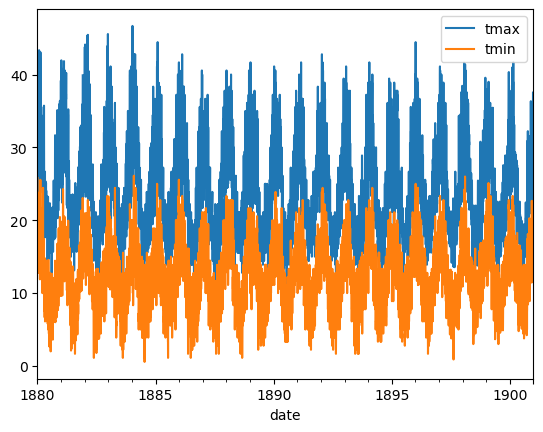

In [5]:
P_Gardens_UNCorr = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\perthgardens_daily_1880-1900.csv")



#Now we need to go back in time and minus 200 years off the date
#Convert To Datetime


P_Gardens_UNCorr['time'] = pd.to_datetime(P_Gardens_UNCorr['time'],format="%d/%m/%Y")
#print(P_Gardens_Corr)
#P_Gardens_Corr

#Split the Year up

P_Gardens_UNCorr = HW_Func.Date_Splitter(P_Gardens_UNCorr,'time',single= True)
P_Gardens_UNCorr['year'] = P_Gardens_UNCorr['year']-200

P_Gardens_UNCorr['date'] = pd.to_datetime(P_Gardens_UNCorr[['year', 'month', 'day']])
P_Gardens_UNCorr


del P_Gardens_UNCorr['time']
del P_Gardens_UNCorr['year']
del P_Gardens_UNCorr['month']
del P_Gardens_UNCorr['day']


P_Gardens_UNCorr = P_Gardens_UNCorr.set_index('date')
P_Gardens_UNCorr.plot()

# Perth Gardens Estimated 1835-1875

In [6]:
#Now lets load thedatasets in
Hist_Max = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
Hist_Min = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")

Hist_Max['date'] = pd.to_datetime(Hist_Max['date'])
Hist_Min['date'] = pd.to_datetime(Hist_Min['date'])

Hist_Max_Mean = Hist_Max[['date','Max Mean']]
Hist_Min_Mean = Hist_Min[['date','Min Mean']]

Hist_Max_Mean = Hist_Max_Mean.rename(columns={'Max Mean':'tmax'})
Hist_Min_Mean = Hist_Min_Mean.rename(columns={'Min Mean':'tmin'})

Hist_Mean = pd.concat([Hist_Max_Mean['date'], Hist_Max_Mean['tmax'],Hist_Min_Mean['tmin']],axis = 1)

Hist_Mean =Hist_Mean.round(1).set_index('date')
Hist_Mean

tmax  tmin
date                  
1830-04-16  27.0   NaN
1830-04-17  27.6  15.1
1830-04-18  29.6  18.2
1830-04-19  28.3  19.2
1830-04-20  26.2  12.5
...          ...   ...
1875-12-28  39.1   NaN
1875-12-29  36.1  22.6
1875-12-30  33.2  19.7
1875-12-31  27.4  19.5
1876-01-01   NaN  19.6

[16697 rows x 2 columns]

### Plot the data

Text(0, 0.5, 'Temperature (degC)')

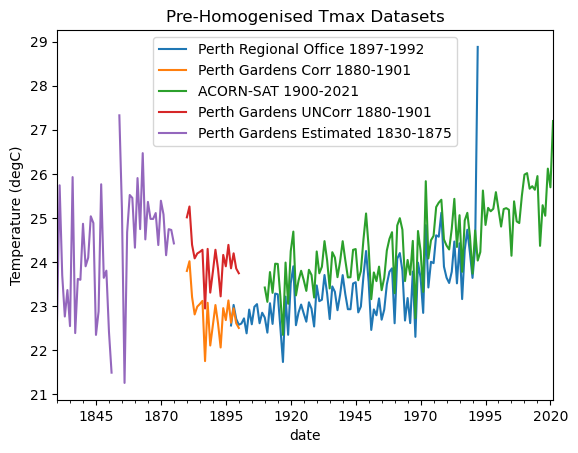

In [7]:
plt.title('Pre-Homogenised Tmax Datasets')
PRO_DE['PRO Max'].resample('Y').mean().plot(label = 'Perth Regional Office 1897-1992')
P_Gardens_Corr['tmax'].resample('Y').mean().plot(label = 'Perth Gardens Corr 1880-1901')
ACORN_SAT['Max'].resample('Y').mean().plot(label = 'ACORN-SAT 1900-2021')
P_Gardens_UNCorr['tmax'].resample('Y').mean().plot(label = 'Perth Gardens UNCorr 1880-1901')
Hist_Mean['tmax'].resample('Y').mean().plot(label = 'Perth Gardens Estimated 1830-1875')
plt.legend()
plt.ylabel('Temperature (degC)')

Text(0, 0.5, 'Temperature (degC)')

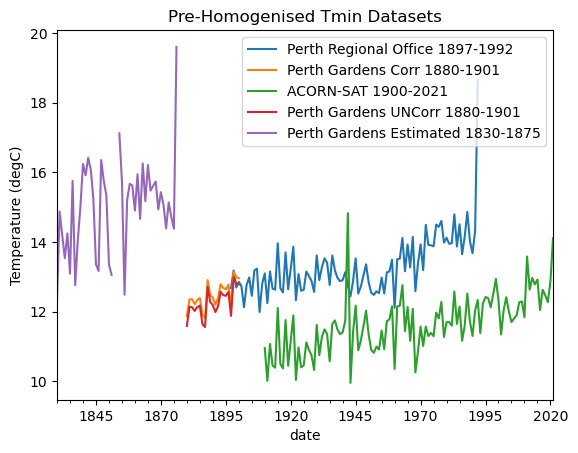

In [8]:
plt.title('Pre-Homogenised Tmin Datasets')
PRO_DE['PRO Min'].resample('Y').mean().plot(label = 'Perth Regional Office 1897-1992')
P_Gardens_Corr['tmin'].resample('Y').mean().plot(label = 'Perth Gardens Corr 1880-1901')
ACORN_SAT['Min'].resample('Y').mean().plot(label = 'ACORN-SAT 1900-2021')
P_Gardens_UNCorr['tmin'].resample('Y').mean().plot(label = 'Perth Gardens UNCorr 1880-1901')
Hist_Mean['tmin'].resample('Y').mean().plot(label = 'Perth Gardens Estimated 1830-1875')
plt.legend()
plt.ylabel('Temperature (degC)')

Make the variable names mroe simpler, first we remove the UNCorr PG because it has already been corrected to the Perth regional office values

In [9]:
ACS = ACORN_SAT.copy()
PGC = P_Gardens_Corr.copy()
PGH = Hist_Mean.copy()
PRO = PRO_DE.copy()


In [10]:
PRO

PRO Max  PRO Min
date                        
1897-01-01     30.6     19.4
1897-01-02     29.4     17.8
1897-01-03     27.8     18.3
1897-01-04     31.7     14.4
1897-01-05     36.7     16.1
...             ...      ...
1992-04-25     29.6     15.7
1992-04-26     30.0     19.5
1992-04-27     22.4     15.7
1992-04-28     22.7     15.7
1992-04-29     24.6     16.3

[34817 rows x 2 columns]

# Step 1 Perth Regional Office 1897-1992 with the 1880-1900 Dataset, Homo already done

In [11]:
#First set PRO columns to tmax and tmin
PRO = PRO.rename(columns={"PRO Max":"tmax"}).rename(columns={"PRO Min":"tmin"})


Now extract PGC for the 1880-1886 dates as we rather use the full dataset of the more recent record to be used for the homogenisation as this would have a more accurate representation or corrected data where its more in sync with the more recent and up to date records.

In [12]:
PGC_Short = PGC.loc['1880-01-01':'1896-12-31']


In [13]:
#concat this onto PRO
PRO_Ext = pd.concat([PGC_Short,PRO],axis = 0)

tmax       tmin
date                            
1896-12-10  28.644000  15.920000
1896-12-11  21.777778  11.382500
1896-12-12  22.625000  13.863636
1896-12-13  25.345455  14.900000
1896-12-14  29.299015  15.920000
1896-12-15  30.629064  17.754762
1896-12-16  29.299015  16.457143
1896-12-17  29.299015  18.405641
1896-12-18  35.161111  20.316111
1896-12-19  34.058801  20.316111
1896-12-20  25.800000  17.754762
1896-12-21  25.800000  17.100000
1896-12-22  24.890909  16.457143
1896-12-23  23.666667  17.100000
1896-12-24  23.666667  12.900000
1896-12-25  22.625000  15.445455
1896-12-26  24.890909  14.900000
1896-12-27  21.777778  11.860000
1896-12-28  22.625000  13.863636
1896-12-29  28.004000  14.400000
1896-12-30  34.058801  17.100000
1896-12-31  29.964039  16.457143
1897-01-01  30.600000  19.400000
1897-01-02  29.400000  17.800000
1897-01-03  27.800000  18.300000
1897-01-04  31.700000  14.400000
1897-01-05  36.700000  16.100000
1897-01-06  33.300000  21.100000
1897-01-07  23.300000  16.100000
1897-01-08  25.000000  14.600000
1897-01-09  31.800000  17.800000
1897-01-10  34.300000  21.200000
1897-01-11  37.500000  22.500000
1897-01-12  39.700000  21.800000
1897-01-13  41.100000  24.200000
1897-01-14  36.900000  21.400000
1897-01-15  34.700000  23.100000
1897-01-16  41.700000  23.200000
1897-01-17  36.100000  18.300000
1897-01-18  25.500000  18.300000
1897-01-19  26.500000  15.500000
1897-01-20  28.000000  15.300000

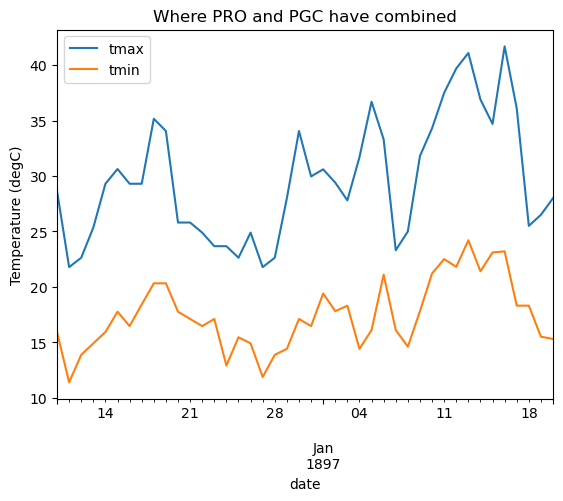

In [14]:

#To show its been combined lets see the values around 1896-1897
PRO_Ext.loc["1896-12-10":"1897-01-20"].plot()
plt.title("Where PRO and PGC have combined")
plt.ylabel("Temperature (degC)")
PRO_Ext.loc["1896-12-10":"1897-01-20"]

Text(0, 0.5, 'Temperature (degC)')

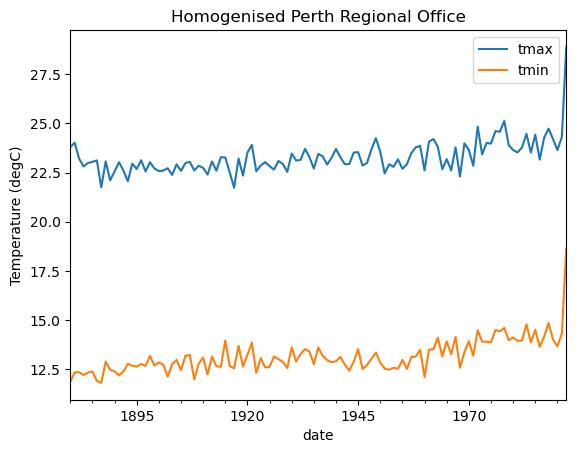

In [15]:
#Lets have a look at the full timeline
PRO_Ext.resample('Y').mean().plot()
plt.title('Homogenised Perth Regional Office')
plt.ylabel("Temperature (degC)")

# Step 2, apply Zacs Q-Q Homogenisation Script to PRO and ACS

Still not fully understanding what Zac had achieved in his scirpt and how he did it, and until we get the paper or some scribbles on what he has done to acheive this then we will have to go by the scritps. The knoweldhe I have of it is that is is scentifically backed up, as it was initially developed by the BOM, then Linden Aschcroft tweaked it for her research and then Zac has tweaked it himself and so I am usuin his version of the function. Thereofre you can see that this versio is his version and he must be recognised in this paper.

In [16]:

#Import Function
def qm_transfer(reference,uncorrected,value):
    #reference = vector of values representing the percentiles of the reference data
    #uncorrected = vector of values representing the percentiles of the data to be corrected
    #value = Value to be adjusted
    
    #  """Use source and destination percentiles to get the homogenised value.
    ## From Linden Ashcroft's R script (adapted from BoM Python script)
    #Given two lists of values representing, for example,
    #temperatures at the 5th to 95th percentiles, and a value
    #representing an amount to be homogenised, return the
    #homogenised value.
    #"""
    
    if pd.isna(value):
        return(np.nan)
    
    if value < round(uncorrected.iloc[0],3):
        return value + (reference.iloc[0] - uncorrected.iloc[0])
    
        #if the value is less than the lowest percentile, 
        #adjustment is difference between
        #the lowest percentile of the two
    
    if value > round(uncorrected.iloc[-1],3):
        return value + (reference.iloc[-1] - uncorrected.iloc[-1])
    
        #if the value is greater than the highest percentile, 
        #adjustment is difference between
        #the highest percentile of the two
    
    ndx = min(bisect_left(np.array(uncorrected), value), len(uncorrected) - 1)
    
    num_equal = np.count_nonzero(np.array(round(uncorrected,3) == value))
    
    if num_equal == 1:
        return value + (reference.iloc[ndx] - uncorrected.iloc[ndx])
        #If the value is an exact percentile value, 
        #then the adjustment is the difference between that percentile
    elif num_equal > 1:
        offset = random.randint(1, num_equal) - 1
        return value + (reference.iloc[ndx + offset] - uncorrected.iloc[ndx + offset])
    
        #If there are two percentiles with the value, 
        #pick one at random and use that to find the adjustment
        
    else:
        return (((reference.iloc[ndx] - reference.iloc[ndx-1])/
                   (uncorrected.iloc[ndx] - uncorrected.iloc[ndx-1]))*
                  (value - uncorrected.iloc[ndx-1]) + reference.iloc[ndx-1])
    
        #Otherwise, find the percentiles 'bin' that the value fits in, 
        #subtract the Glaisher percentile value from the value of interest
        #multiply that by a ratio of the two percentiles 
        #(if they are changing at the same rate this term will be 1) 
        #and add the Stevenson screen value for that percentile value

From Linden Ashcroft's R script (adapted from BoM Python script)
Given two lists of values representing, for example,
temperatures at the 5th to 95th percentiles, and a value
representing an amount to be homogenised, return the
homogenised value.

Otherwise, find the percentiles 'bin' that the value fits in, 
#subtract the Glaisher percentile value from the value of interest
#multiply that by a ratio of the two percentiles 
#(if they are changing at the same rate this term will be 1) 
#and add the Stevenson screen value for that percentile value

In [17]:
#Now we have Historical 
PRO_Ext
historical =PRO_Ext
PRO_Ext

tmax       tmin
date                            
1880-01-01  38.494444  26.093889
1880-01-02  40.383333  23.760556
1880-01-03  40.438889  21.427222
1880-01-04  40.716667  22.038333
1880-01-05  39.050000  19.048269
...               ...        ...
1992-04-25  29.600000  15.700000
1992-04-26  30.000000  19.500000
1992-04-27  22.400000  15.700000
1992-04-28  22.700000  15.700000
1992-04-29  24.600000  16.300000

[41027 rows x 2 columns]

In [18]:
#And Modern

ACS = ACS.rename(columns={'Max':'tmax'})
ACS = ACS.rename(columns={'Min':'tmin'})
ACS
modern = ACS
modern

tmax  tmin
date                  
1910-01-01  26.7  16.4
1910-01-02  27.0  13.5
1910-01-03  27.5  12.0
1910-01-04  24.0  13.5
1910-01-05  24.8   9.8
...          ...   ...
2021-06-26  20.3   5.8
2021-06-27  15.6   8.7
2021-06-28  19.7  10.5
2021-06-29  18.0  12.5
2021-06-30  16.8   7.7

[40724 rows x 2 columns]

In [19]:
idx = historical.index.intersection(modern.index)
historical_overlap=PRO_Ext.loc["1910-01-01":"1919-12-31"]
modern_overlap = modern.loc["1910-01-01":"1919-12-31"]

In [20]:
historical_overlap

tmax  tmin
date                  
1910-01-01  25.8  18.3
1910-01-02  26.1  16.3
1910-01-03  26.7  15.2
1910-01-04  23.2  16.3
1910-01-05  24.0  13.6
...          ...   ...
1919-12-27  21.8  10.6
1919-12-28  30.6  13.5
1919-12-29  37.7  18.9
1919-12-30  32.6  19.8
1919-12-31  35.7  19.0

[3652 rows x 2 columns]

In [21]:
modern_overlap

tmax  tmin
date                  
1910-01-01  26.7  16.4
1910-01-02  27.0  13.5
1910-01-03  27.5  12.0
1910-01-04  24.0  13.5
1910-01-05  24.8   9.8
...          ...   ...
1919-12-27  22.4   6.5
1919-12-28  31.8   9.9
1919-12-29  38.0  17.2
1919-12-30  33.7  17.4
1919-12-31  36.5  17.3

[3652 rows x 2 columns]

That is the overlap above

In [22]:
timestamp = historical.columns
correctedDf = historical.copy()
for col in historical:
    historicalPct = historical_overlap[col].quantile(np.arange(0.05,1,0.05))
    modernPct = modern_overlap[col].quantile(np.arange(0.05,1,0.05))
    correctedList = []
    for j in range(len(historical[col])):
        correctedList.append(qm_transfer(modernPct,historicalPct,historical[col][j]))
    correctedDf[col + '_corrected'] = correctedList
    del historicalPct, modernPct, correctedList
corrected = correctedDf.drop(correctedDf.columns[0:len(historical.columns)], axis=1)
corrected.columns = corrected.columns.str.replace('_corrected','')
#uncorrected = data.copy()
#data.update(corrected)

In [23]:
corrected.tail(50)

tmax       tmin
date                            
1992-03-11  32.295238  16.140000
1992-03-12  31.457143  18.600000
1992-03-13  29.240000  19.100000
1992-03-14  22.614286  17.900000
1992-03-15  25.450000  16.800000
1992-03-16  24.555556  16.250000
1992-03-17  26.400000  17.200000
1992-03-18  29.880000  18.000000
1992-03-19  25.787500  16.690000
1992-03-20  25.562500  17.400000
1992-03-21  23.766667  15.920000
1992-03-22  26.300000  15.700000
1992-03-23  31.038095  14.411111
1992-03-24  29.773333  18.200000
1992-03-25  25.675000  18.900000
1992-03-26  26.100000  12.766667
1992-03-27  27.957143  13.877778
1992-03-28  28.813333  13.877778
1992-03-29  30.200000  14.144444
1992-03-30  26.500000  14.233333
1992-03-31  32.911111  16.470000
1992-04-01  32.190476        NaN
1992-04-02  27.100000  17.800000
1992-04-03  25.787500  16.470000
1992-04-04  26.400000  14.650000
1992-04-05  28.813333  15.250000
1992-04-06  28.492857  15.100000
1992-04-07  22.500000  16.360000
1992-04-08  26.700000  16.030000
1992-04-09  27.635714  12.900000
1992-04-10  25.675000  13.300000
1992-04-11  27.850000  15.400000
1992-04-12  29.453333  14.650000
1992-04-13  26.600000  13.166667
1992-04-14  27.207143  12.766667
1992-04-15  30.093333  16.690000
1992-04-16  28.171429  17.200000
1992-04-17  27.314286  15.250000
1992-04-18  25.112500  16.140000
1992-04-19  22.400000  16.580000
1992-04-20  23.071429   9.220000
1992-04-21  25.225000  10.700000
1992-04-22  26.900000  11.100000
1992-04-23  26.800000  10.800000
1992-04-24  29.133333  10.060000
1992-04-25  30.723810  13.700000
1992-04-26  31.142857  17.900000
1992-04-27  23.300000  13.700000
1992-04-28  23.533333  13.700000
1992-04-29  25.450000  14.233333

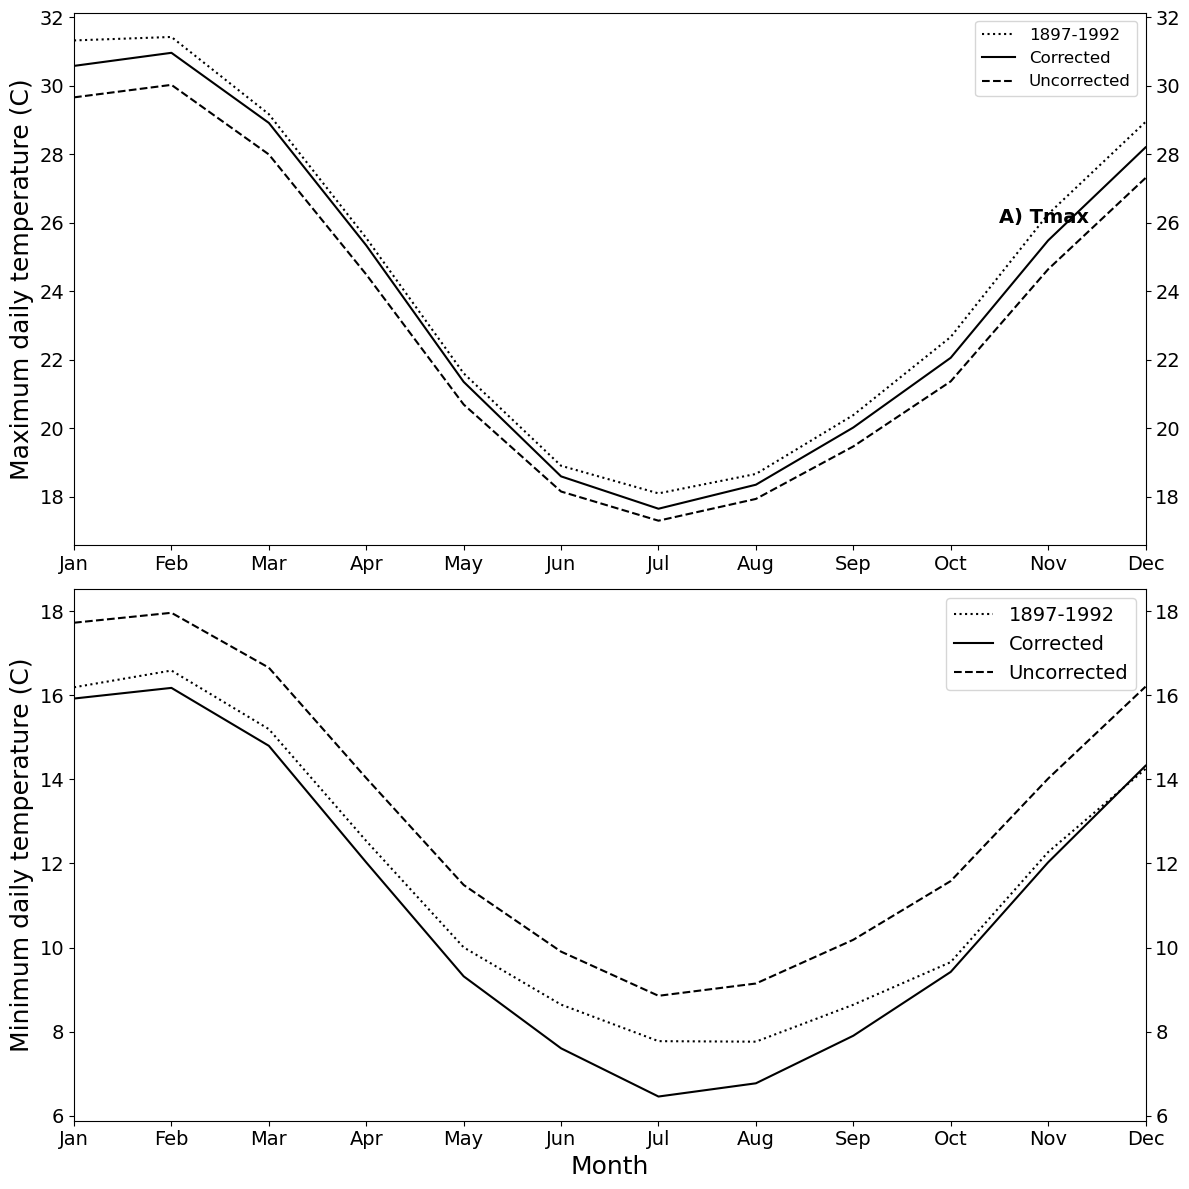

In [24]:
f = plt.figure(figsize=(12,12))

ax = f.add_subplot(211)

ax.plot(modern['tmax'].groupby(modern.index.month).mean(),  label = '1897-1992',c='k',ls=':')
ax.plot(corrected['tmax'].groupby(corrected.index.month).mean(),  label = 'Corrected',c='k')
ax.plot(historical['tmax'].groupby(historical.index.month).mean(),  label = 'Uncorrected',c='k',ls='--')

ax.set_ylabel('Maximum daily temperature (C)', fontsize=18)

y = np.arange(1,13,1)
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax.set_xticks(y)
ax.set_xticklabels(labels,fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(labelright=True,right=True)

ax.tick_params(axis='both', which='major', labelsize=14)

ax.text(10.5,26,'A) Tmax',fontweight='bold', fontsize=14)

ax.legend(loc='best', fontsize=12)

ax.set_xlim([1, 12])

ax2 = f.add_subplot(212)

#plt.figure(figsize=(16,7))

ax2.plot(modern['tmin'].groupby(modern.index.month).mean(),  label = '1897-1992',c='k',ls=':')
ax2.plot(corrected['tmin'].groupby(corrected.index.month).mean(),  label = 'Corrected',c='k')
ax2.plot(historical['tmin'].groupby(historical.index.month).mean(),  label = 'Uncorrected',c='k',ls='--')

#plt.plot(concatDf['10:00_corrected'].groupby(concatDf.index.month).mean(),  label = '1843-1862 corrected mean')
#plt.plot(subset['10:00'].groupby(subset.index.month).mean(),  label = '1843-1862 uncorrected mean')

ax2.legend(loc='best', fontsize=12)

#ax2.title.set_text('4pm monthly mean temperatures (corrected/uncorrected)')
ax2.set_xlabel('Month', fontsize=18)
ax2.set_ylabel('Minimum daily temperature (C)', fontsize=18)

ax2.set_xticks(y)
ax2.set_xticklabels(labels,fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(labelright=True,right=True)

ax2.legend(loc='best', fontsize=14)

ax2.set_xlim([1, 12])
#ax2.text(10.4,29.15,'B) Tmin',fontweight='bold', fontsize=14)

ax2.tick_params(axis='both', which='major', labelsize=14)

f.tight_layout()

f.patch.set_facecolor('white')

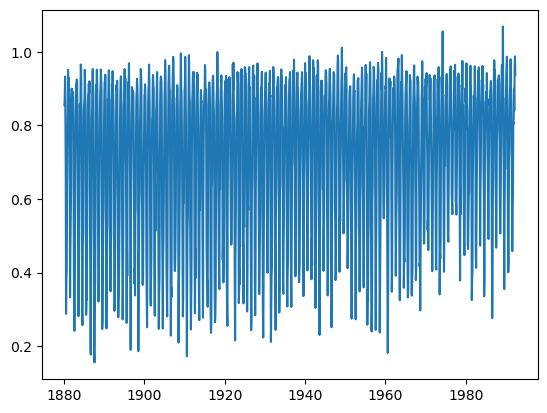

In [25]:
plt.plot((corrected['tmax'] - historical['tmax']).resample('M').mean())

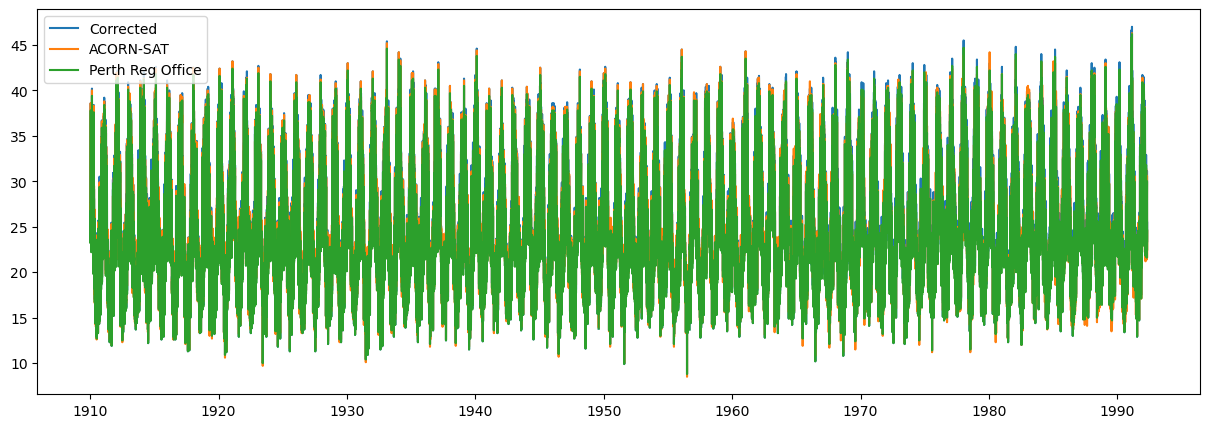

In [26]:
f = plt.figure(figsize=(15,5))
plt.plot(corrected['tmax'].loc[idx], label='Corrected')
plt.plot(modern['tmax'].loc[idx], label='ACORN-SAT')
plt.plot(historical['tmax'].loc[idx], label='Perth Reg Office')
plt.legend()

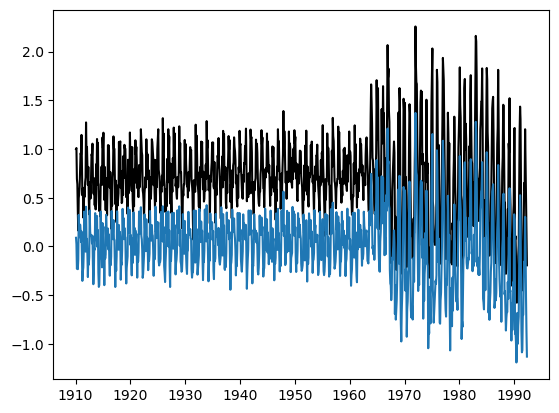

In [27]:
plt.plot((modern['tmax'] - historical['tmax']).resample('M').mean(),color = 'k')
plt.plot((modern['tmax'] - corrected['tmax']).resample('M').mean())

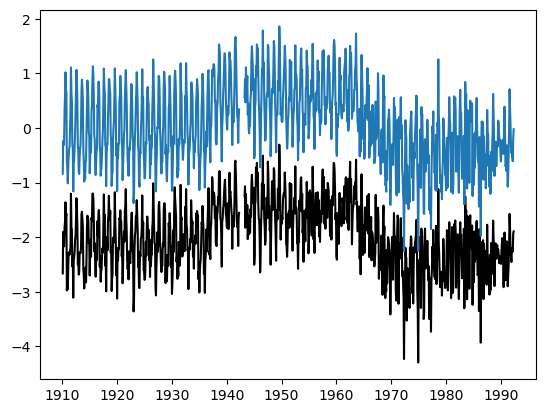

In [28]:
plt.plot((modern['tmin'] - historical['tmin']).resample('M').mean(),color = 'k')
plt.plot((modern['tmin'] - corrected['tmin']).resample('M').mean())

<AxesSubplot:xlabel='date'>

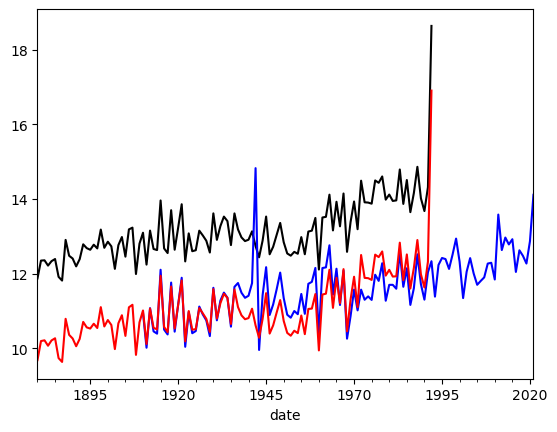

In [29]:
PRO_Ext['tmin'].resample('Y').mean().plot(color= 'k')
ACS['tmin'].resample('Y').mean().plot(color = 'b')
corrected['tmin'].resample('Y').mean().plot(color = 'r')


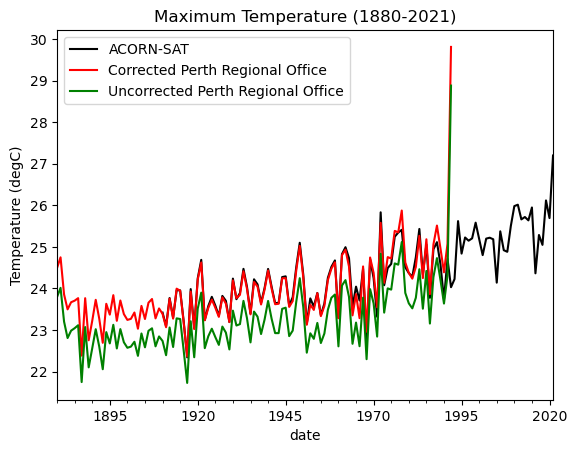

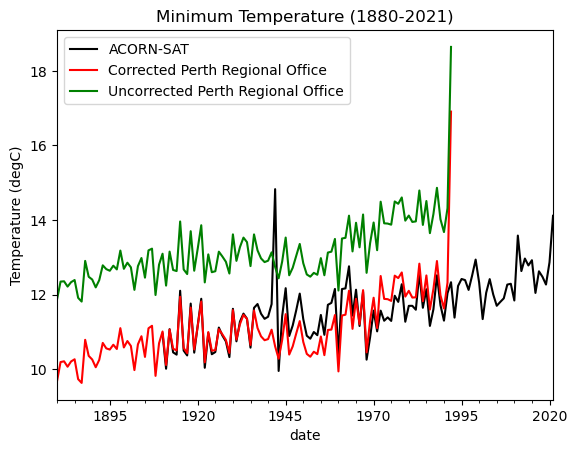

In [30]:
plt.figure()
modern['tmax'].resample('Y').mean().plot(color= 'k',label = 'ACORN-SAT')
corrected['tmax'].resample('Y').mean().plot(color = 'r',label = 'Corrected Perth Regional Office')
historical['tmax'].resample('Y').mean().plot(color = 'g',label = 'Uncorrected Perth Regional Office')
plt.title('Maximum Temperature (1880-2021)')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.figure()
modern['tmin'].resample('Y').mean().plot(color= 'k',label = 'ACORN-SAT')
corrected['tmin'].resample('Y').mean().plot(color = 'r',label = 'Corrected Perth Regional Office')
historical['tmin'].resample('Y').mean().plot(color = 'g',label = 'Uncorrected Perth Regional Office')
plt.title('Minimum Temperature (1880-2021)')
plt.ylabel('Temperature (degC)')
plt.legend()

Now we want to merge this two datasets together, as the first 10 years are actually the most important of the overlap therefore the data post 1919 amd pre 1910 data can be ignored.

tmax  tmin
date                  
1880-01-01  39.3  24.5
1880-01-02  41.2  22.2
1880-01-03  41.2  19.8
1880-01-04  41.5  20.4
1880-01-05  39.8  17.4
...          ...   ...
1909-12-27  24.6  11.3
1909-12-28  26.7  13.9
1909-12-29  37.4  17.3
1909-12-30  36.9  23.9
1909-12-31  33.2  17.1

[10957 rows x 2 columns]

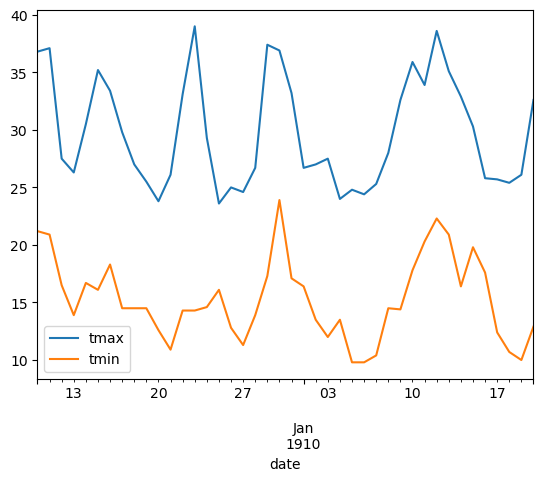

In [31]:
#Merge PGS and PRO
#Set index to date
corrected['tmax'] = corrected['tmax'].round(1)
corrected['tmin'] = corrected['tmin'].round(1)
modern['tmax'] = modern['tmax'].round(1)
modern['tmin'] = modern['tmin'].round(1)


corrected_1880_09 = corrected.loc['1880-01-01':'1909-12-31']

#concat this onto ACORN_SAT
ACORN_SAT_FULL = pd.concat([corrected_1880_09,modern])
ACORN_SAT_FULL.loc["1909-12-10":"1910-01-20"].plot()
#ACORN_SAT_FULL.plot()
#ACORN_SAT_FULL.resample('Y').mean().plot()
#PRO_FULL.to_csv(r"E:\LIBRARY\UNIVERSITY\Masters Research\Python\Data\FOR HOMOGENISATION\PRO_1880_1992.csv")
corrected_1880_09

In [32]:
modern

tmax  tmin
date                  
1910-01-01  26.7  16.4
1910-01-02  27.0  13.5
1910-01-03  27.5  12.0
1910-01-04  24.0  13.5
1910-01-05  24.8   9.8
...          ...   ...
2021-06-26  20.3   5.8
2021-06-27  15.6   8.7
2021-06-28  19.7  10.5
2021-06-29  18.0  12.5
2021-06-30  16.8   7.7

[40724 rows x 2 columns]

Text(0, 0.5, 'temperature (degC)')

<Figure size 640x480 with 0 Axes>

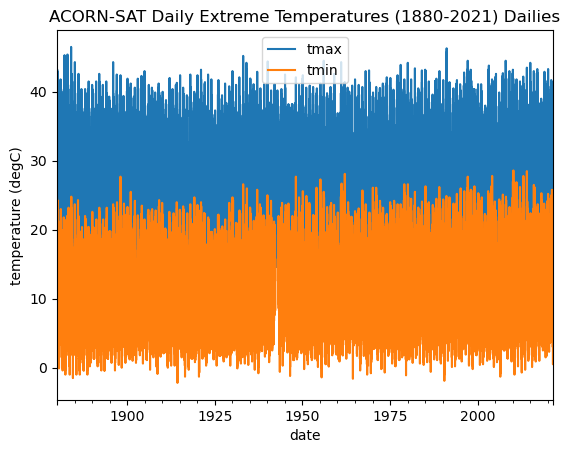

<Figure size 640x480 with 0 Axes>

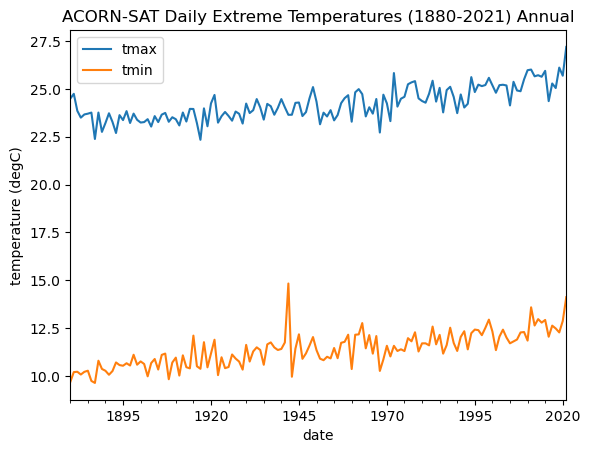

In [33]:
plt.figure()

ACORN_SAT_FULL.plot()
plt.title('ACORN-SAT Daily Extreme Temperatures (1880-2021) Dailies')
plt.ylabel('temperature (degC)')

plt.figure()
ACORN_SAT_FULL.resample('Y').mean().plot()
plt.title('ACORN-SAT Daily Extreme Temperatures (1880-2021) Annual')
plt.ylabel('temperature (degC)')

# Step 3 The Q-Q Homgenisation with my method 

In [34]:
ACS_Ext = ACORN_SAT_FULL
ACS_Ext

tmax  tmin
date                  
1880-01-01  39.3  24.5
1880-01-02  41.2  22.2
1880-01-03  41.2  19.8
1880-01-04  41.5  20.4
1880-01-05  39.8  17.4
...          ...   ...
2021-06-26  20.3   5.8
2021-06-27  15.6   8.7
2021-06-28  19.7  10.5
2021-06-29  18.0  12.5
2021-06-30  16.8   7.7

[51681 rows x 2 columns]

In [35]:
PGH

tmax  tmin
date                  
1830-04-16  27.0   NaN
1830-04-17  27.6  15.1
1830-04-18  29.6  18.2
1830-04-19  28.3  19.2
1830-04-20  26.2  12.5
...          ...   ...
1875-12-28  39.1   NaN
1875-12-29  36.1  22.6
1875-12-30  33.2  19.7
1875-12-31  27.4  19.5
1876-01-01   NaN  19.6

[16697 rows x 2 columns]

Now it is the attempt to put these two datasets together by Q-Q matching, this is different to Zac code as that utilised the Intersection ofn the two datasets, this time I dont have that luxury.So instead we are going to use a Q-Q matching techqnieu that uses the 30 years beofr 1875 and after 1880 to match toether, this means thatb the hypotheiss is that no climate change exists within this 65 year span. Therefore it is able to match datapoints on a Qauntile basis as we have more then enough values to get a rough idea of the climate and temperatures in this period.

In [36]:
Hist_30 = PGH.loc['1846-01-01':'1875-12-31']
Pres_30 = ACS_Ext.loc['1880-01-01':'1909-12-31']

In [37]:
len(Hist_30)

10957

In [38]:
len(Pres_30)

10957

Now we plot the hsitogram of all the data within each month to see the spread of the data and hoepfully aboid cases where one month may be lacking compared to other months.

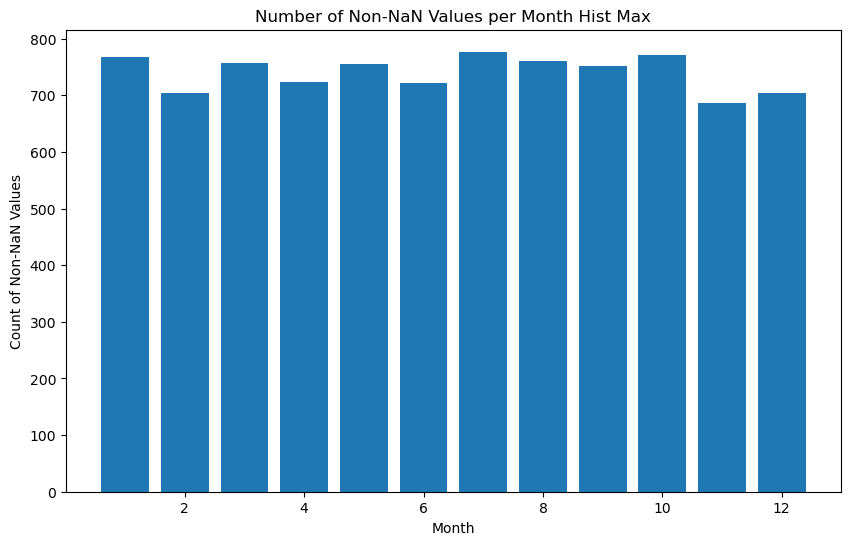

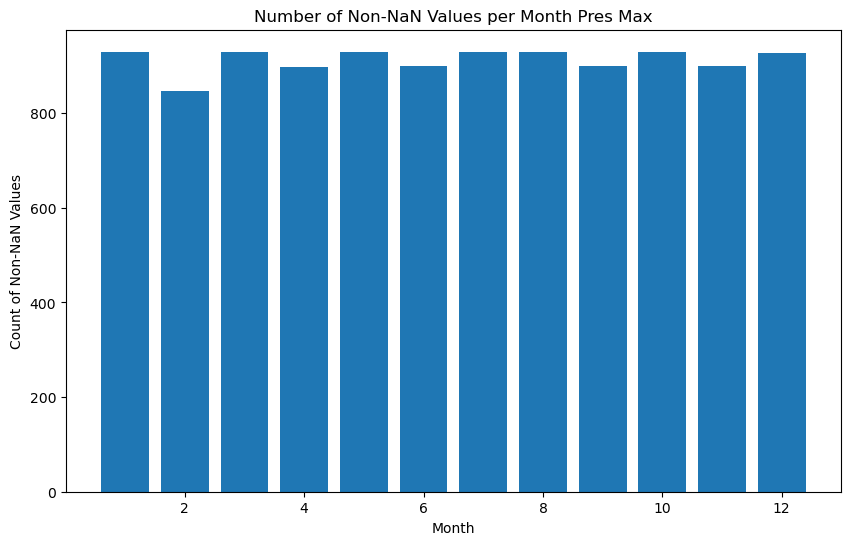

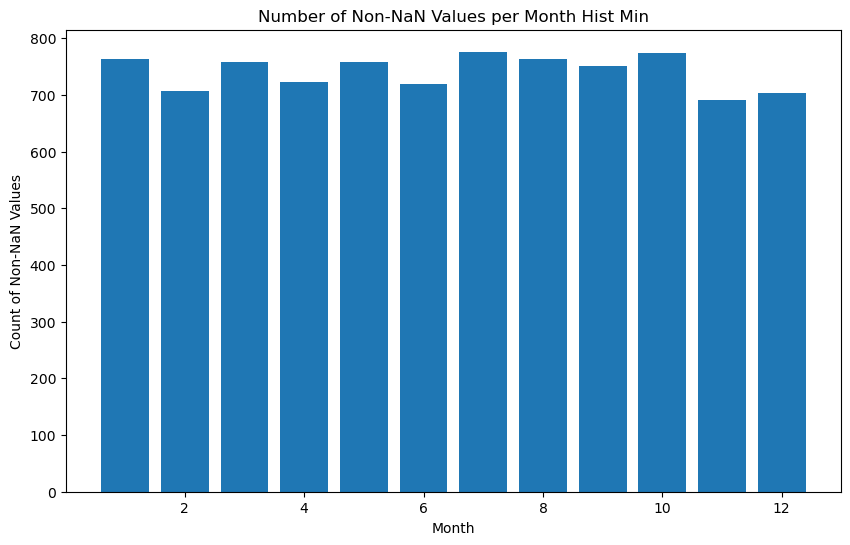

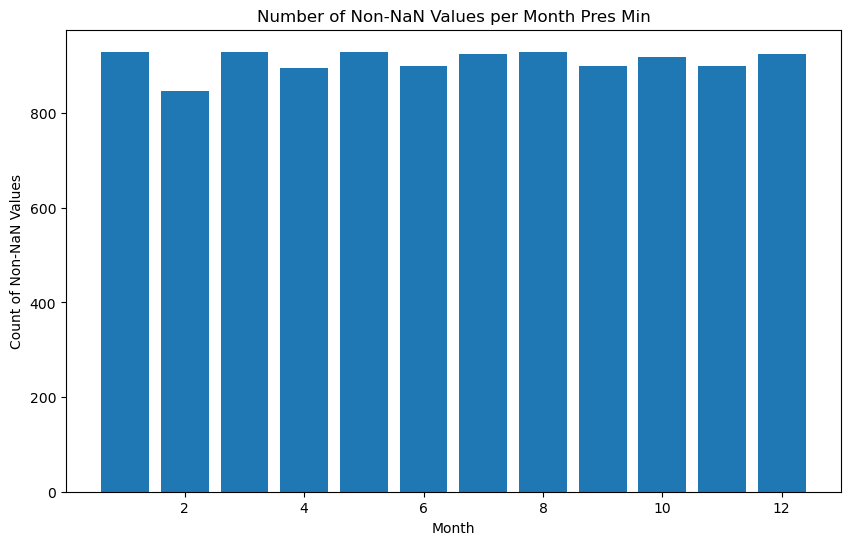

In [39]:
#Drop rows with NaN values
Hist_30_Data_Checker_Mx = Hist_30['tmax'].dropna()
Pres_30_Data_Checker_Mx = Pres_30['tmax'].dropna()

Hist_30_Data_Checker_Mn = Hist_30['tmin'].dropna()
Pres_30_Data_Checker_Mn = Pres_30['tmin'].dropna()

# Group by month and count non-NaN values in each group
H_Mx = Hist_30_Data_Checker_Mx.groupby([Hist_30_Data_Checker_Mx.index.month]).size()
P_Mx = Pres_30_Data_Checker_Mx.groupby([Pres_30_Data_Checker_Mx.index.month]).size()
H_Mn = Hist_30_Data_Checker_Mn.groupby([Hist_30_Data_Checker_Mn.index.month]).size()
P_Mn = Pres_30_Data_Checker_Mn.groupby([Pres_30_Data_Checker_Mn.index.month]).size()




# Step 4: Create a histogram
plt.figure(figsize=(10, 6))
plt.bar(H_Mx.index, H_Mx, align='center')
plt.xlabel('Month')
plt.ylabel('Count of Non-NaN Values')
plt.title('Number of Non-NaN Values per Month Hist Max')
plt.show()

plt.figure(figsize=(10, 6))

plt.bar(P_Mx.index, P_Mx, align='center')

plt.xlabel('Month')
plt.ylabel('Count of Non-NaN Values')
plt.title('Number of Non-NaN Values per Month Pres Max')
plt.show()
plt.figure(figsize=(10, 6))

plt.bar(H_Mn.index, H_Mn, align='center')

plt.xlabel('Month')
plt.ylabel('Count of Non-NaN Values')
plt.title('Number of Non-NaN Values per Month Hist Min')
plt.show()
plt.figure(figsize=(10, 6))

plt.bar(P_Mn.index, P_Mn, align='center')



plt.xlabel('Month')
plt.ylabel('Count of Non-NaN Values')
plt.title('Number of Non-NaN Values per Month Pres Min')
plt.show()


In [40]:
H_Mx = Hist_30_Data_Checker_Mx.groupby([ Hist_30_Data_Checker_Mx.index.month]).size()



In [41]:
H_Mx

date
1     767
2     704
3     757
4     724
5     756
6     721
7     777
8     761
9     752
10    771
11    687
12    704
Name: tmax, dtype: int64

In [42]:
#Now to check if any mins are greater then max, whihc out of possible 12000 datapoints onlyabout 30 have issues, lets fix
#these and wil be fixed before Q-Q happens for each trial, this example these values get set to nans
print(PGH.loc["1833-03-10"])
PGH[PGH['tmax'] < PGH['tmin']] = np.nan
PGH.loc["1833-03-10"]

tmax    23.5
tmin    25.9
Name: 1833-03-10 00:00:00, dtype: float64


tmax   NaN
tmin   NaN
Name: 1833-03-10 00:00:00, dtype: float64

In [43]:
#Do the same for these despite it has already been done
ACS_Ext[ACS_Ext['tmax'] < ACS_Ext['tmin']] = np.nan


In [44]:
PGH.dropna()

tmax  tmin
date                  
1830-04-17  27.6  15.1
1830-04-18  29.6  18.2
1830-04-19  28.3  19.2
1830-04-20  26.2  12.5
1830-04-21  26.2  13.5
...          ...   ...
1875-12-23  44.0  17.7
1875-12-24  26.8  21.8
1875-12-29  36.1  22.6
1875-12-30  33.2  19.7
1875-12-31  27.4  19.5

[12496 rows x 2 columns]

So they are the same length and they had 30 years worth of data now, I think the first thing to look at are:
    
    The histograms of the overall climates


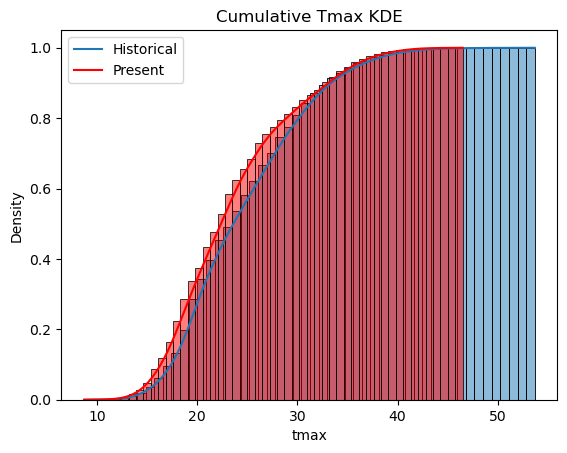

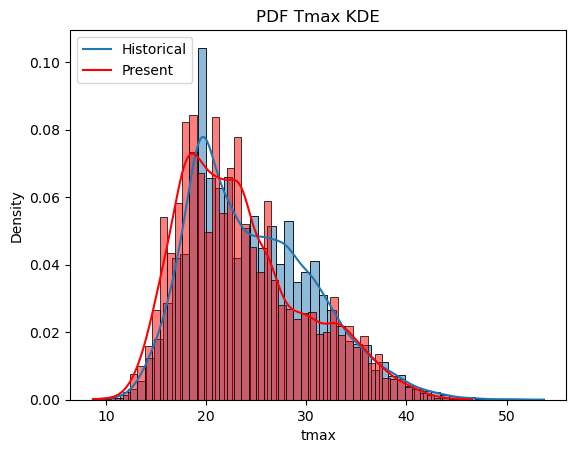

In [45]:
#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30, x="tmax", kde=True, label = 'Historical',cumulative=True,stat='density')
sns.histplot(data=Pres_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density').set(title = 'Cumulative Tmax KDE')
plt.legend(loc='upper left', labels=['Historical', 'Present'])

#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30, x="tmax", kde=True, label = 'Historical',cumulative=False,stat='density')
sns.histplot(data=Pres_30, x="tmax", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density').set(title = 'PDF Tmax KDE')
plt.legend(loc='upper left', labels=['Historical', 'Present'])


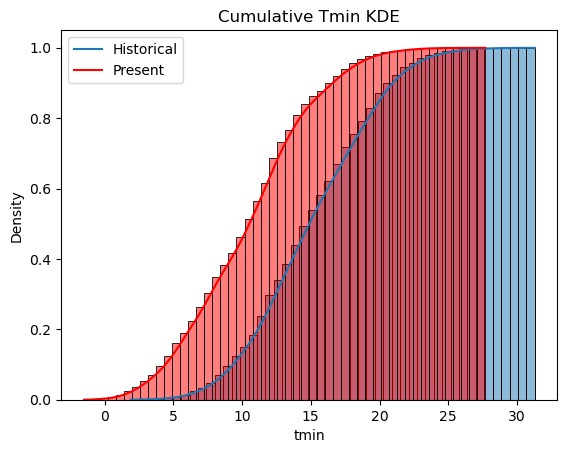

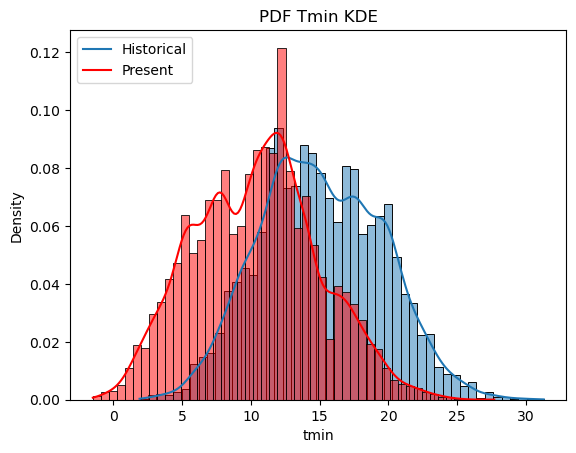

In [46]:
#Histogram of the overall climate
plt.figure()
sns.histplot(data=Hist_30, x="tmin", kde=True, label = 'Historical',cumulative=True,stat='density')
sns.histplot(data=Pres_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=True,stat='density').set(title = 'Cumulative Tmin KDE')
plt.legend(loc='upper left', labels=['Historical', 'Present'])

plt.figure()
sns.histplot(data=Hist_30, x="tmin", kde=True, label = 'Historical',cumulative=False,stat='density')
sns.histplot(data=Pres_30, x="tmin", kde=True,color = 'r',label = 'Present',cumulative=False,stat='density').set(title = 'PDF Tmin KDE')
plt.legend(loc='upper left', labels=['Historical', 'Present'])


#So since we have the data we are using for the Q-Q which is Hist_30, and Pres_30 we want to try and do this on an annual version then a monthly version then we can finalise it with the for loop for the monthly values

In [47]:
Q_Pres = Pres_30.quantile(np.arange(0,1.0001,0.0001)).round(4)
Q_Pres = Q_Pres.rename_axis('Quantile').reset_index()

Q_Hist = Hist_30.quantile(np.arange(0,1.0001,0.0001)).round(4)
Q_Hist = Q_Hist.rename_axis('Quantile').reset_index()
Q_Hist

Quantile     tmax     tmin
0        0.0000   8.8000   1.9000
1        0.0001   9.6853   2.5199
2        0.0002  10.2624   2.6771
3        0.0003  10.5312   2.7000
4        0.0004  10.6000   2.7000
...         ...      ...      ...
9996     0.9996  49.3964  29.7000
9997     0.9997  50.2721  29.7686
9998     0.9998  50.6000  30.0144
9999     0.9999  50.9556  30.5030
10000    1.0000  53.7000  31.3000

[10001 rows x 3 columns]

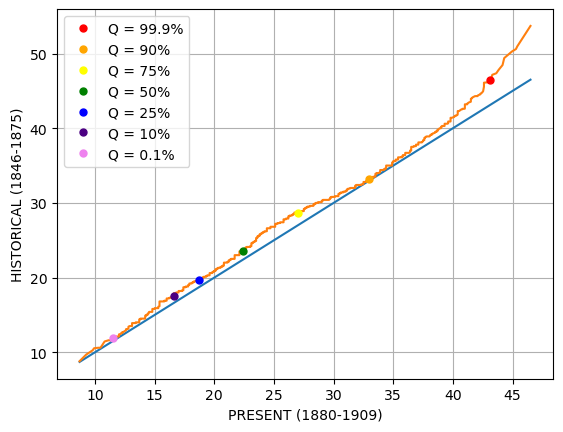

In [48]:
plt.plot(Q_Pres['tmax'],Q_Pres['tmax'])
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('HISTORICAL (1846-1875)')

plt.plot(Q_Pres['tmax'],Q_Hist['tmax'])

plt.plot(Q_Pres['tmax'].loc[9990],Q_Hist['tmax'].loc[9990],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres['tmax'].loc[9000],Q_Hist['tmax'].loc[9000],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres['tmax'].loc[7500],Q_Hist['tmax'].loc[7500],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres['tmax'].loc[5000],Q_Hist['tmax'].loc[5000],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres['tmax'].loc[2500],Q_Hist['tmax'].loc[2500],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres['tmax'].loc[1000],Q_Hist['tmax'].loc[1000],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres['tmax'].loc[10],Q_Hist['tmax'].loc[10],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper left')
plt.grid()

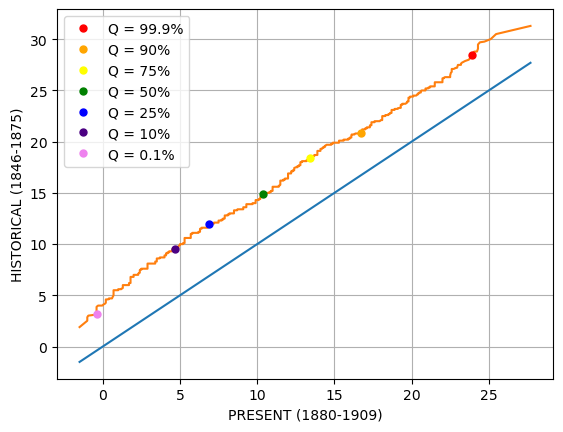

In [49]:
plt.plot(Q_Pres['tmin'],Q_Pres['tmin'])
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.xlabel('PRESENT (1880-1909)')
plt.ylabel('HISTORICAL (1846-1875)')

plt.plot(Q_Pres['tmin'],Q_Hist['tmin'])

plt.plot(Q_Pres['tmin'].loc[9990],Q_Hist['tmin'].loc[9990],'.',color = 'red', markersize = '10',label = 'Q = 99.9%')

plt.plot(Q_Pres['tmin'].loc[9000],Q_Hist['tmin'].loc[9000],'.',color = 'orange', markersize = '10',label = 'Q = 90%')

plt.plot(Q_Pres['tmin'].loc[7500],Q_Hist['tmin'].loc[7500],'.',color = 'yellow', markersize = '10',label = 'Q = 75%')

plt.plot(Q_Pres['tmin'].loc[5000],Q_Hist['tmin'].loc[5000],'.',color = 'green', markersize = '10',label = 'Q = 50%')

plt.plot(Q_Pres['tmin'].loc[2500],Q_Hist['tmin'].loc[2500],'.',color = 'blue', markersize = '10',label = 'Q = 25%')

plt.plot(Q_Pres['tmin'].loc[1000],Q_Hist['tmin'].loc[1000],'.',color = 'indigo', markersize = '10',label = 'Q = 10%')

plt.plot(Q_Pres['tmin'].loc[10],Q_Hist['tmin'].loc[10],'.',color = 'violet', markersize = '10',label = 'Q = 0.1%')

plt.legend(loc = 'upper left')
plt.grid()

In [50]:
#Now apply the q-q function
number = 0.0001

Hist_All = PGH.reset_index()
number = 0.0001
Hist_QQ_Dates_St = '1846-01-01'
Hist_QQ_Dates_En = '1875-12-31'

Pres_QQ_Date_St = "1880-01-01"
Pres_QQ_Date_En = "1909-12-31"
#^ call in using function


    
    

Historical_30 = PGH.loc[Hist_QQ_Dates_St:Hist_QQ_Dates_En].reset_index()
Present_30 = ACS_Ext.loc[Pres_QQ_Date_St:Pres_QQ_Date_En].reset_index()

In [51]:
#Select a nparange value lemgth that goes from Q0 to Q1, and produce the quantiles
QPRE = Present_30.quantile(np.arange(0,1+number,number)).round(4)
QPRE = QPRE.rename_axis('Quantile').reset_index()

QHIS = Historical_30.quantile(np.arange(0,1+number,number)).round(4)
QHIS = QHIS.rename_axis('Quantile').reset_index()


In [52]:
#Select a nparange value lemgth that goes from Q0 to Q1, and produce the quantiles
QPRE = Present_30.quantile(np.arange(0,1+number,number)).round(4)
QPRE = QPRE.rename_axis('Quantile').reset_index()

QHIS = Historical_30.quantile(np.arange(0,1+number,number)).round(4)
QHIS = QHIS.rename_axis('Quantile').reset_index()


In [54]:

Hist_All = Hist_All.reset_index()
#This above is the full range of historical data

#What we will do is append it to max and min values before combiniing with dat
Hist_Updated_Max = []
Hist_Updated_Min = []
Hist_Updated_Date = []




#For loop for all dates 
for i in range(0,len(Hist_All)):
    Hist_Updated_Date.append(Hist_All['date'].loc[i])

    
    #Now get all the information from the Q-Q data for max and min for each date
    #MAX
    
    #If data shows a nan value set the updated value to nan
    if (math.isnan(Hist_All['tmax'].loc[i])== True):
        Hist_Updated_Max.append(np.NaN)
    else:
        #Set Temp old 
        Temp_Old = Hist_All['tmax'].loc[i]
        

        
        #So now we get the closest value for the max:
        Column = ['tmax']

        #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
        Min_val = np.abs(QHIS[Column] - Temp_Old).min()

        #This finds the quantile*10^5 or by the decimla place you use to find the tmax
        closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

        #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
        Hist_Updated_Max.append(QPRE[Column].loc[closest_index[0]].values[0])
    
    #Now get all the information from the Q-Q data for max and min for each date
    #MIN
    
    #If data shows a nan value set the updated value to nan
    if (math.isnan(Hist_All['tmin'].loc[i])== True):
        Hist_Updated_Min.append(np.NaN)
    else:
       #Set Temp old 
        Temp_Old = Hist_All['tmin'].loc[i]
        

        #So now we get the closest value for the max:
        Column = ['tmin']

        #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
        Min_val = np.abs(QHIS[Column] - Temp_Old).min()

        #This finds the quantile*10^5 or by the decimla place you use to find the tmax
        closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

        #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
        Hist_Updated_Min.append(QPRE[Column].loc[closest_index[0]].values[0])
Hist_Updated_Date = pd.DataFrame(Hist_Updated_Date, columns=['date'])
Hist_Updated_Max = pd.DataFrame(Hist_Updated_Max, columns=['tmax'])
Hist_Updated_Min = pd.DataFrame(Hist_Updated_Min, columns=['tmin'])

        
#Now combine altogether
Hist_Updated = pd.concat([Hist_Updated_Date, Hist_Updated_Max, Hist_Updated_Min], axis = 1).set_index('date')
#Clean any datapoints that have max < min
Hist_Updated[Hist_Updated['tmax'] < Hist_Updated['tmin']] = np.nan
        
        
        
        
        
        
        
        
        
        
        
        
  

In [55]:
PGH_H = Hist_Updated 

In [56]:
PGH_H

tmax  tmin
date                  
1830-04-16  25.1   NaN
1830-04-17  25.8  10.8
1830-04-18  28.0  13.2
1830-04-19  26.3  14.1
1830-04-20  24.2   7.8
...          ...   ...
1875-12-28  38.1   NaN
1875-12-29  35.4  18.3
1875-12-30  33.0  14.5
1875-12-31  25.5  14.3
1876-01-01   NaN  14.4

[16697 rows x 2 columns]

# Step 4 Clean and combine temperature data

Firstly we dont have the data between 1876 to 1879 therefore we must add the nans into her


In [58]:
#add missing data
import pandas as pd
from datetime import datetime, timedelta

start_date = datetime(1876, 1, 1)
end_date = datetime(1879, 12, 31)
delta = timedelta(days=1)

current_date = start_date
missing_dates = []

while current_date <= end_date:
    date_str = current_date.strftime("%Y-%m-%d")
    tmax = np.nan  # Replace with the actual tmax value for each date
    tmin = np.nan  # Replace with the actual tmin value for each date
    missing_dates.append({"date": date_str, "tmax": tmax, "tmin": tmin})
    current_date += delta

Missing_Data = pd.DataFrame(missing_dates)
Missing_Data['date'] = pd.to_datetime(Missing_Data['date'])
Missing_Data = Missing_Data.set_index('date')


Now combine all the data

In [59]:
dfs = [PGH_H, Missing_Data, ACS_Ext]
ACS_Completed = pd.concat(dfs,axis = 0)
ACS_Completed = ACS_Completed.reset_index()
ACS_Completed['date'] = pd.to_datetime(ACS_Completed['date'])
ACS_Completed = ACS_Completed.set_index('date')

Plot all the data

<AxesSubplot:xlabel='date'>

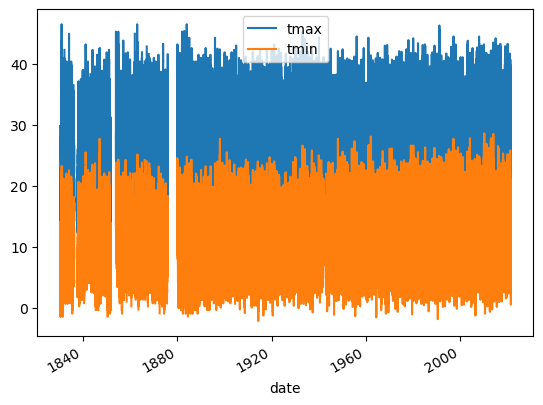

In [60]:
ACS_Completed.plot()

<AxesSubplot:xlabel='date'>

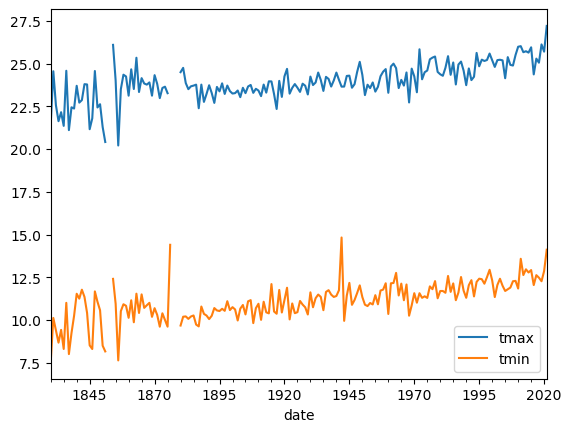

In [61]:
ACS_Completed.resample('Y').mean().plot()

Now we have completed the full run, this means that we have to fix the Q-Q coding again in order for the historical trials to have no issues with Tmin > Tmax at ANY staeg of the Q-Q run.

# Step 5 Applying the homogenisation To trials

In [62]:
def Simple_QQ_Regression(Q_step, Historical, Present, Hist_Dates, Pres_Date):
    '''
    Q_step: Value
    Must be non negative and at least less the 0.1
    
    Historical: DataFrame
    Must have the date as the index
    
    Present: DataFrame
    Must have the date as the index
    
    Hist_Dates/Pres_Dates: Vector
    String of the dates in Y-M-D or the format that is given with the dataframes
    
    '''
    Historical[Historical['tmax'] < Historical['tmin']] = np.nan
    number = Q_step
    Historical_All = Historical
    
    Present[Present['tmax'] < Present['tmin']] = np.nan

    Present = Present
    Hist_QQ_Dates_St = Hist_Dates[0]
    Hist_QQ_Dates_En = Hist_Dates[1]

    Pres_QQ_Date_St = Pres_Date[0]
    Pres_QQ_Date_En = Pres_Date[1]
    #^ call in using function





    Historical_30 = Historical_All.loc[Hist_QQ_Dates_St:Hist_QQ_Dates_En].reset_index()
    Present_30 = Present.loc[Pres_QQ_Date_St:Pres_QQ_Date_En].reset_index()



    #Select a nparange value lemgth that goes from Q0 to Q1, and produce the quantiles
    QPRE = Present_30.quantile(np.arange(0,1+number,number)).round(4)
    QPRE = QPRE.rename_axis('Quantile').reset_index()

    QHIS = Historical_30.quantile(np.arange(0,1+number,number)).round(4)
    QHIS = QHIS.rename_axis('Quantile').reset_index()


    Hist_All = Historical_All.reset_index()
    #This above is the full range of historical data

    #What we will do is append it to max and min values before combiniing with dat
    Hist_Updated_Max = []
    Hist_Updated_Min = []
    Hist_Updated_Date = []




    #For loop for all dates 
    for i in range(0,len(Hist_All)):
        Hist_Updated_Date.append(Hist_All['date'].loc[i])


        #Now get all the information from the Q-Q data for max and min for each date
        #MAX

        #If data shows a nan value set the updated value to nan
        if (math.isnan(Hist_All['tmax'].loc[i])== True):
            Hist_Updated_Max.append(np.NaN)
        else:
            #Set Temp old 
            Temp_Old = Hist_All['tmax'].loc[i]



            #So now we get the closest value for the max:
            Column = ['tmax']

            #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
            Min_val = np.abs(QHIS[Column] - Temp_Old).min()

            #This finds the quantile*10^5 or by the decimla place you use to find the tmax
            closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

            #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
            Hist_Updated_Max.append(QPRE[Column].loc[closest_index[0]].values[0])

        #Now get all the information from the Q-Q data for max and min for each date
        #MIN

        #If data shows a nan value set the updated value to nan
        if (math.isnan(Hist_All['tmin'].loc[i])== True):
            Hist_Updated_Min.append(np.NaN)
        else:
            #Set Temp old 
            Temp_Old = Hist_All['tmin'].loc[i]


            #So now we get the closest value for the max:
            Column = ['tmin']

            #This finds the value where the Q-Hist of the tmax is the minimum it can be for the tmax value presented
            Min_val = np.abs(QHIS[Column] - Temp_Old).min()

            #This finds the quantile*10^5 or by the decimla place you use to find the tmax
            closest_index =  QHIS[np.abs(QHIS[Column]- Temp_Old) == Min_val].stack().idxmin()

            #Now this will use the index to find the Present Vlaue to updayte the historical value to using the index/quantile*10^%
            Hist_Updated_Min.append(QPRE[Column].loc[closest_index[0]].values[0])
    Hist_Updated_Date = pd.DataFrame(Hist_Updated_Date, columns=['date'])
    Hist_Updated_Max = pd.DataFrame(Hist_Updated_Max, columns=['tmax'])
    Hist_Updated_Min = pd.DataFrame(Hist_Updated_Min, columns=['tmin'])


    #Now combine altogether
    Hist_Updated = pd.concat([Hist_Updated_Date, Hist_Updated_Max, Hist_Updated_Min], axis = 1)
    Hist_Updated[Hist_Updated['tmax'] < Hist_Updated['tmin']] = np.nan

    return(Hist_Updated)
        
        
        
#Simple_QQ_Regression(0.0001, PGH, ACS_Ext, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])

Now putting it into a for loop


In [63]:
RUNIT = False
if (RUNIT == True):
    #Now lets load thedatasets in
    Hist_Max = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\Tmax_Est_1830_1875.csv")
    Hist_Min = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\Tmin_Est_1830_1875.csv")



    Hist_Max['date'] = pd.to_datetime(Hist_Max['date'])
    Hist_Min['date'] = pd.to_datetime(Hist_Min['date'])


    HMax_Col = Hist_Max.columns
    HMin_Col = Hist_Min.columns
    Present = ACS_Ext.reset_index()

    length_col = len(HMax_Col)

    i =8

    #Fix the data so its only one trail we are looking at first, this is the columns of the max and min
    Hist_Max_Col = Hist_Max[['date',HMax_Col[i]]]
    Hist_Min_Col = Hist_Min[['date',HMin_Col[i]]]

    #We rename them to they have tmax and tmin
    Hist_Max_Col = Hist_Max_Col.rename(columns={HMax_Col[i]:'tmax'})
    Hist_Min_Col = Hist_Min_Col.rename(columns={HMin_Col[i]:'tmin'})



    #We add the historical datasets together
    Hist_Together = pd.concat([Hist_Max_Col['date'], Hist_Max_Col['tmax'],Hist_Min_Col['tmin']],axis = 1)




    Hist_Together =Hist_Together.round(4).set_index('date')

    Present = Present.set_index('date')

    #This is the first trial
    Hist_Corrected = Simple_QQ_Regression(0.0001, Hist_Together, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])

    #This is the corrected temps
    Hist_Corrected = Hist_Corrected.rename(columns={'tmax':HMax_Col[i]})
    Hist_Corrected = Hist_Corrected.rename(columns={'tmin':HMin_Col[i]})

    #This is the full list
    Hist_Corrected_Dict_Full = Hist_Corrected



    for i in range(9,length_col):
        print(i)
        #Fix the data so its only one trail we are looking at first
        Hist_Max_Col = Hist_Max[['date',HMax_Col[i]]]
        Hist_Min_Col = Hist_Min[['date',HMin_Col[i]]]


        Hist_Max_Col = Hist_Max_Col.rename(columns={HMax_Col[i]:'tmax'})
        Hist_Min_Col = Hist_Min_Col.rename(columns={HMin_Col[i]:'tmin'})

        Hist_Together = pd.concat([Hist_Max_Col['date'], Hist_Max_Col['tmax'],Hist_Min_Col['tmin']],axis = 1)
        Hist_Together =Hist_Together.round(4).set_index('date')

        Hist_Corrected = Simple_QQ_Regression(0.0001, Hist_Together, Present, ['1846-01-01',"1875-12-31"], ['1880-01-01',"1909-12-31"])

        Hist_Corrected = Hist_Corrected.rename(columns={'tmax':HMax_Col[i]})
        Hist_Corrected = Hist_Corrected.rename(columns={'tmin':HMin_Col[i]})

        Hist_Corrected_Dict_Full = pd.merge(Hist_Corrected_Dict_Full,Hist_Corrected,on = 'date').round(1)



    Hist_Corrected_Dict_Full.to_csv(r"C:\Users\jarra\Desktop\Perth_1830_1875_Corrected_Deleted_MxLessMin.csv")
else:
    Hist_Corrected_Dict_Full = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\Perth_1830_1875_Corrected_Deleted_MxLessMin.csv")


# Step 6 Combining the data together


In [120]:
if RUNIT == True:   
    #Now lets do the trials
    #Gte the present the missing gap
    df_new = ACS_Ext
    df_gapped = Missing_Data 

    #Lets combine the 1875 thorugh to 2021
    combined_New = pd.concat([df_gapped, df_new],axis = 0)

    Historical = Hist_Corrected_Dict_Full
    Historical['date'] = pd.to_datetime(Historical['date'])
    Historical = Historical.set_index('date')
    #--------------------- BEGIN RUN

    #Initial Run
    i = 1

    #Historical Trial
    df_old = Historical[['Max_{}'.format(i),"Min_{}".format(i)]]
    df_old = df_old.rename(columns={"Max_{}".format(i):"tmax"}).rename(columns={"Min_{}".format(i):"tmin"})

    #Combine them together
    combined_timeseries = pd.concat([df_old, df_new],axis = 0)
    combined_timeseries = combined_timeseries.rename(columns={"tmax":"Max_{}".format(i)}).rename(columns={"tmin":"Min_{}".format(i)})

    Entirety_Data = combined_timeseries

    for i in range(2,1001):
        #Historical Trial
        df_old = Historical[['Max_{}'.format(i),"Min_{}".format(i)]]
        df_old = df_old.rename(columns={"Max_{}".format(i):"tmax"}).rename(columns={"Min_{}".format(i):"tmin"})

        #Combine them together
        precombined_timeseries = [df_old, combined_New]
        combined_timeseries = pd.concat(precombined_timeseries,axis = 0)

        combined_timeseries = combined_timeseries.rename(columns={"tmax":"Max_{}".format(i)}).rename(columns={"tmin":"Min_{}".format(i)})

        #Combine the trials together
        Entirety_Data = pd.concat([Entirety_Data,combined_timeseries],axis= 1)
        print(i)
    Entirety_Data.to_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\Perth_1830_2021_Corrected_Deleted_MxLessMin.csv")

else:
    Entirety_Data = pd.read_csv(r"C:\Users\jarra\Desktop\Masters Research\Python\Data\FOR HOMOGENISATION\COMPLETE HOMOGENISED\Perth_1830_2021_Corrected_Deleted_MxLessMin.csv")




<AxesSubplot:xlabel='date'>

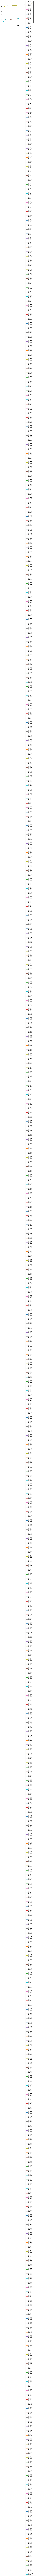

In [117]:
Entirety_Data.resample('10Y').mean().plot()

#Just From looking at the decadal resmaple mean, what I can observe is that in the 1840s we seet a large spike in temperatures, I wouod generally beliebe that this is due to the limited data and metadata and a reuslt of my own q-q regression techniques that cause itm but we cannot disclude that in the 1830s we see the vaocanic eruption of Cosiguina occuring around this period which on a global average we see a dip of a degree in the temperatures. Most lileky in our case this is probablt not the case but I t5hink the eruption is still an mportant forcing that cant be ignored is we do not a strogner eruption event since. It may aslo be a possibilitry that the Tambora erupition may still had some linguriing effects on this period as well as the satr of the 1830s may have inocrportated some sort of volcanic residue from this massive eruption that esitmated to drop the temperatyre by almost 1.5C

https://www.climatechangenews.com/2012/07/30/berkley-earth-average-temperature-of-the-earth%E2%80%99s-land-has-risen-by-1-5-%C2%B0c-over-past-250-years/

CHECK THE YEARLY DATA, LIMIT THAT ANALYSIS AND AFTER DONE HEATWAVE ASSESSMENT AS FOCUS IS HW DOING

TLAK ABOUT IT WITH HEATWAVE ASSESSMNET 
